![](https://blog.hubspot.com/hs-fs/hubfs/a-b-testing-explanation.jpg?width=650&name=a-b-testing-explanation.jpg)

A/B testing plays a critical role in decision-making processes across various industries. It is a method of comparing and testing the effectiveness and benefits of two (or more) different business strategies and finding the strategy that works best. Running A/B testing helps businesses save time and money that could have been wasted if the chosen strategy didn't work. 

In marketing, A/B tests can be used in many areas:

* improving email open rates,
* advertisements on social media,
* product recommendations on your web page,
* testing different pictures or descriptions of your product and many more.

### About data

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

### Goal

Evaluate A/B testing results from this dataset and decide which marketing strategy works the best and has [statistically significant](https://en.wikipedia.org/wiki/Statistical_significance) differences among the test groups.

## Data Analysis

In this analysis, I'm going to focus on the distribution of different variables of this data set. I need to make sure that the attributes of each promotion group are symmetrically distributed so that the results of this A/B testing are fair and correct. Let's load our libraries and data and check the distribution. 

In [1]:
#loading libraries
library(dplyr)
library(ggplot2)

#reading the data
data <- read.csv("../input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




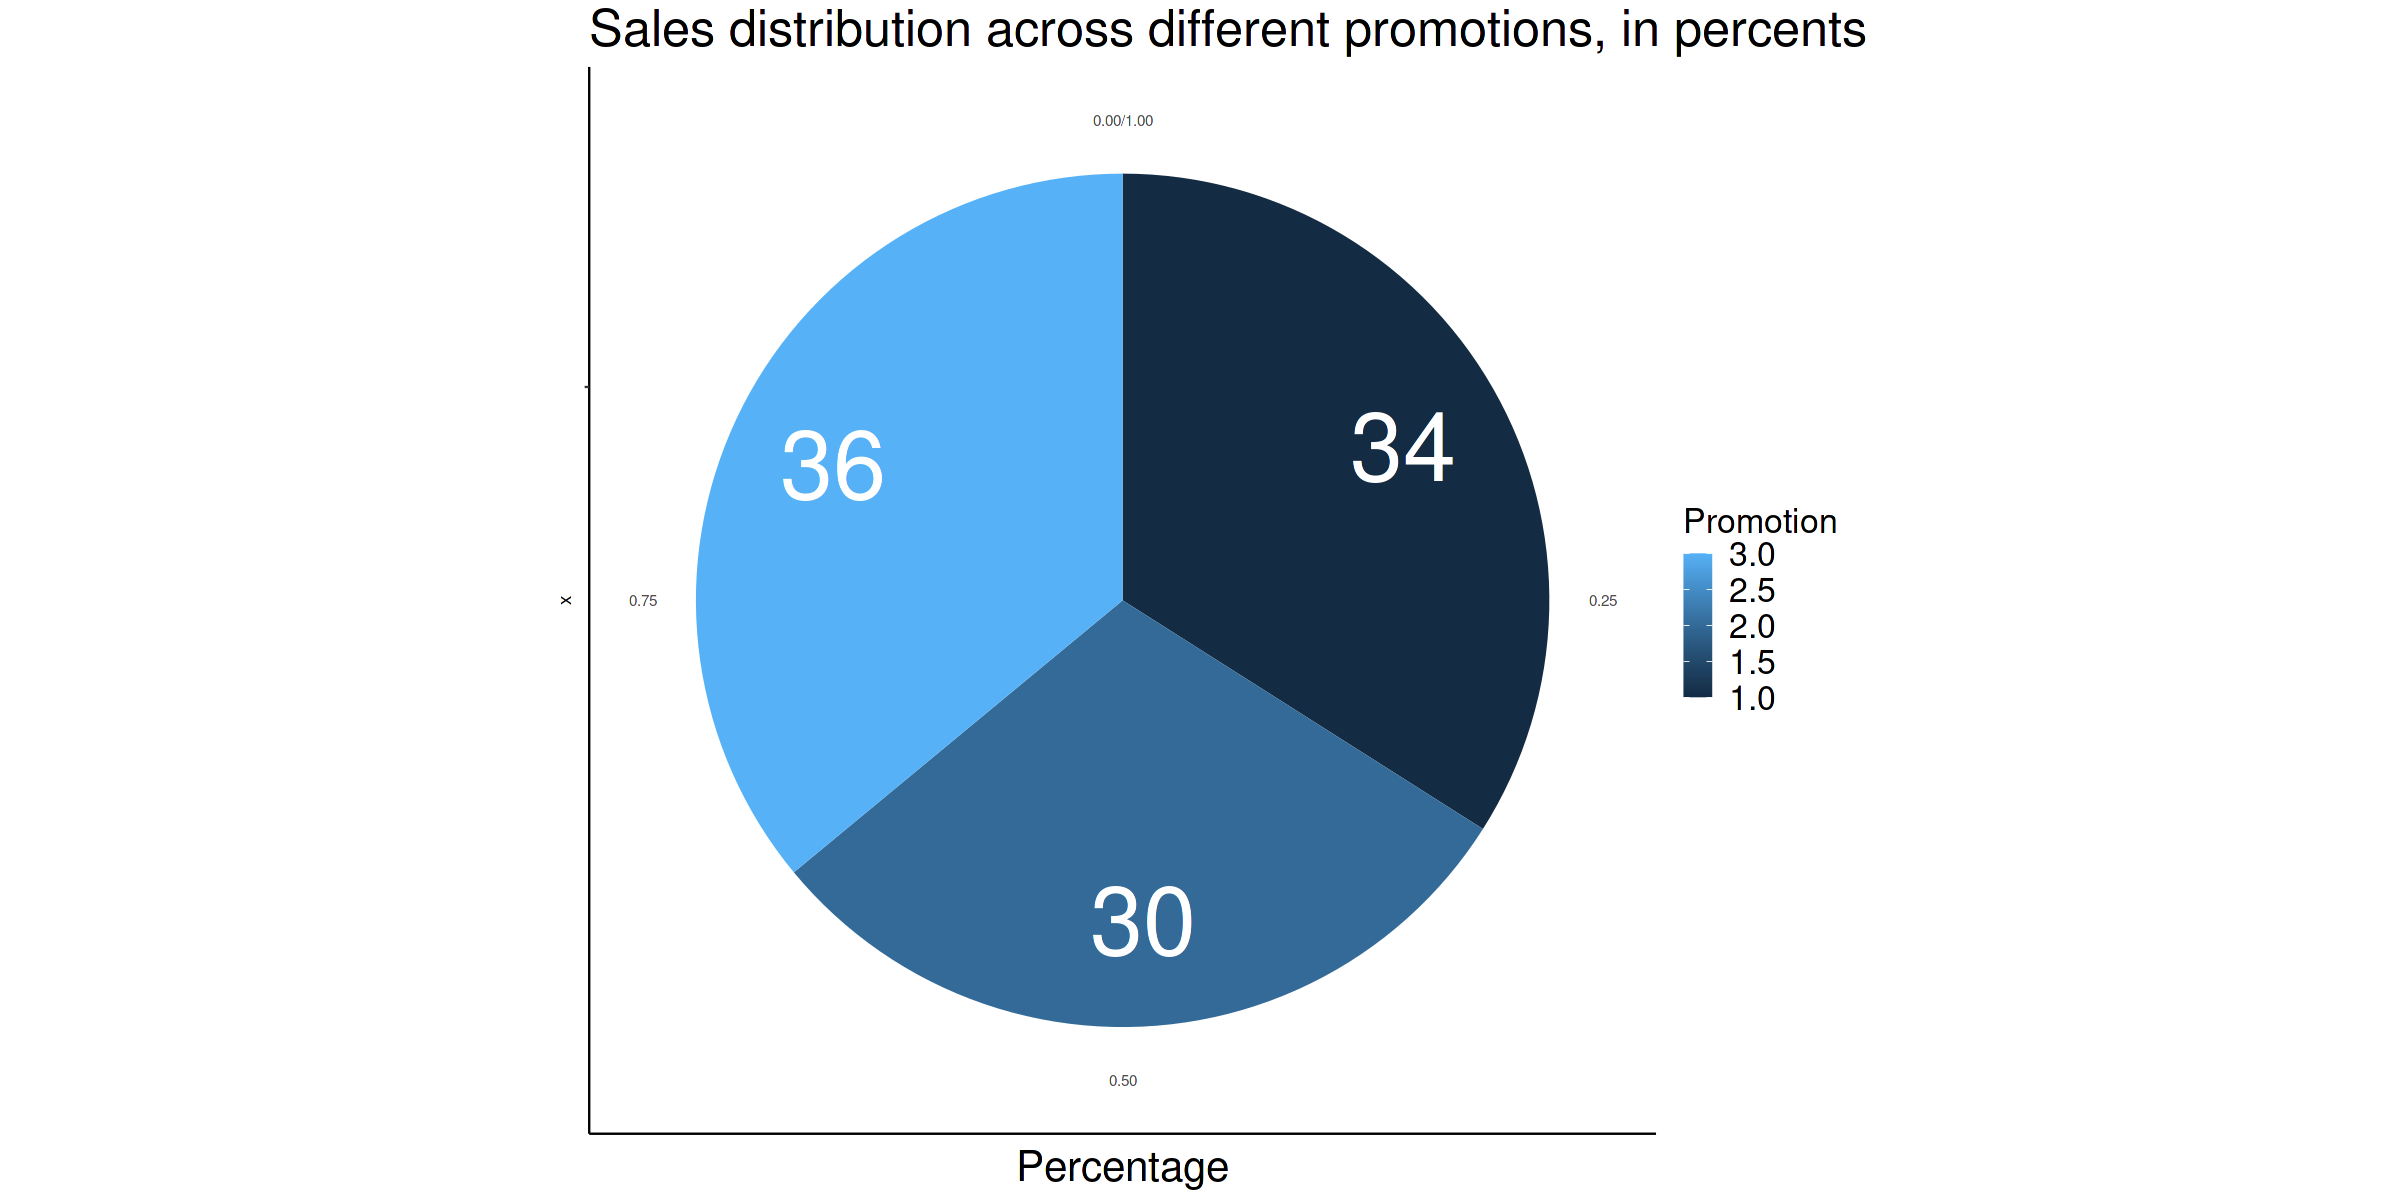

In [2]:
#groupping data by Promotion
SalesDist <- data %>%
  group_by(Promotion) %>%
  summarize(Sales=sum(SalesInThousands))%>%
  mutate(Percentage=round(Sales/sum(Sales)*100))

#visualizing data
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(SalesDist, aes(x="", y=Percentage, fill=Promotion)) +
  geom_bar(width=1, stat="identity", position=position_fill()) +
  geom_text(aes(x=1.25, label=Percentage), position=position_fill(vjust=0.5), color="white", size=20) +
  coord_polar("y") +
  ggtitle("Sales distribution across different promotions, in percents") +
  theme_classic() +
  theme(legend.title = element_text(size = 20), legend.text = element_text(size = 20), plot.title = element_text(size = 30),
       axis.title.x = element_text(size = 25))

As we can see from this chart, the promotion **group 3 has the largest aggregate sales amount (36%)**. However, **each promotion group takes roughly one third** of the total sales during the promotion weeks. 

Let's look at the **market sizes** in each promotion group.

`summarise()` has grouped output by 'Promotion'. You can override using the `.groups` argument.



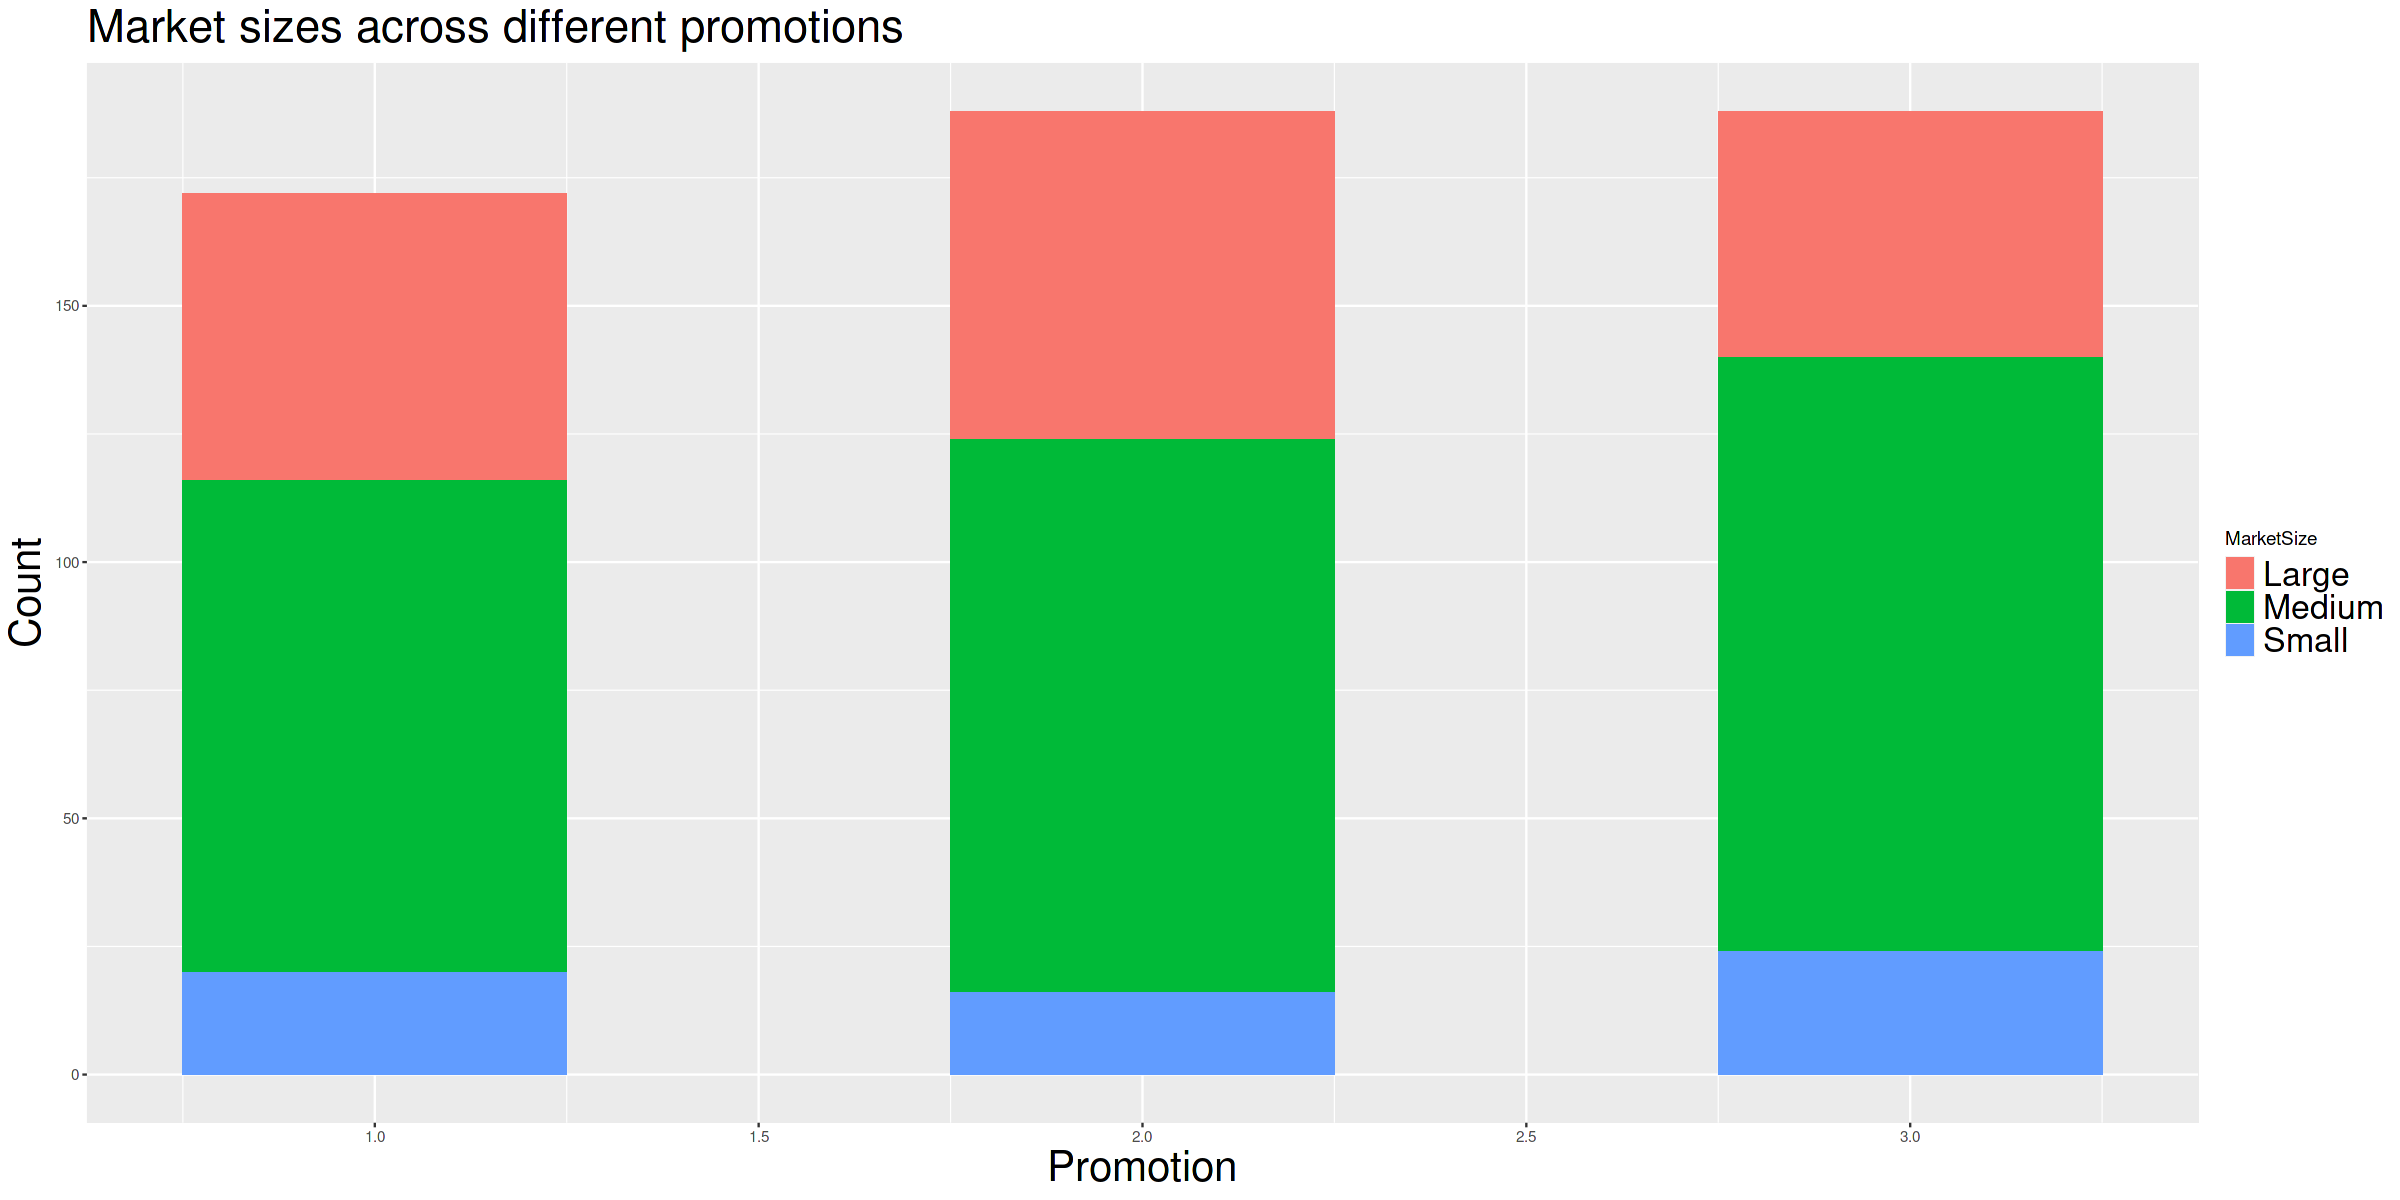

In [3]:
#groupping data by Promotion and MarketSize
Market <- data %>%
group_by(Promotion, MarketSize) %>%
summarize(Count=n())

#visualizing data
ggplot(Market, aes(x=Promotion, y=Count, fill=MarketSize)) +
geom_bar(width=0.5, stat="identity", position="stack") +
ylab("Count") +
xlab("Promotion") +
ggtitle("Market sizes across different promotions") +
theme(legend.text=element_text(size=20), plot.title = element_text(size=27), axis.title = element_text(size = 25))

Here we see that the **medium market size occupies the most** among all three promotion groups, while the small market size occupies the least. 

Now I'm going to explore the **AgeOfStore** column:

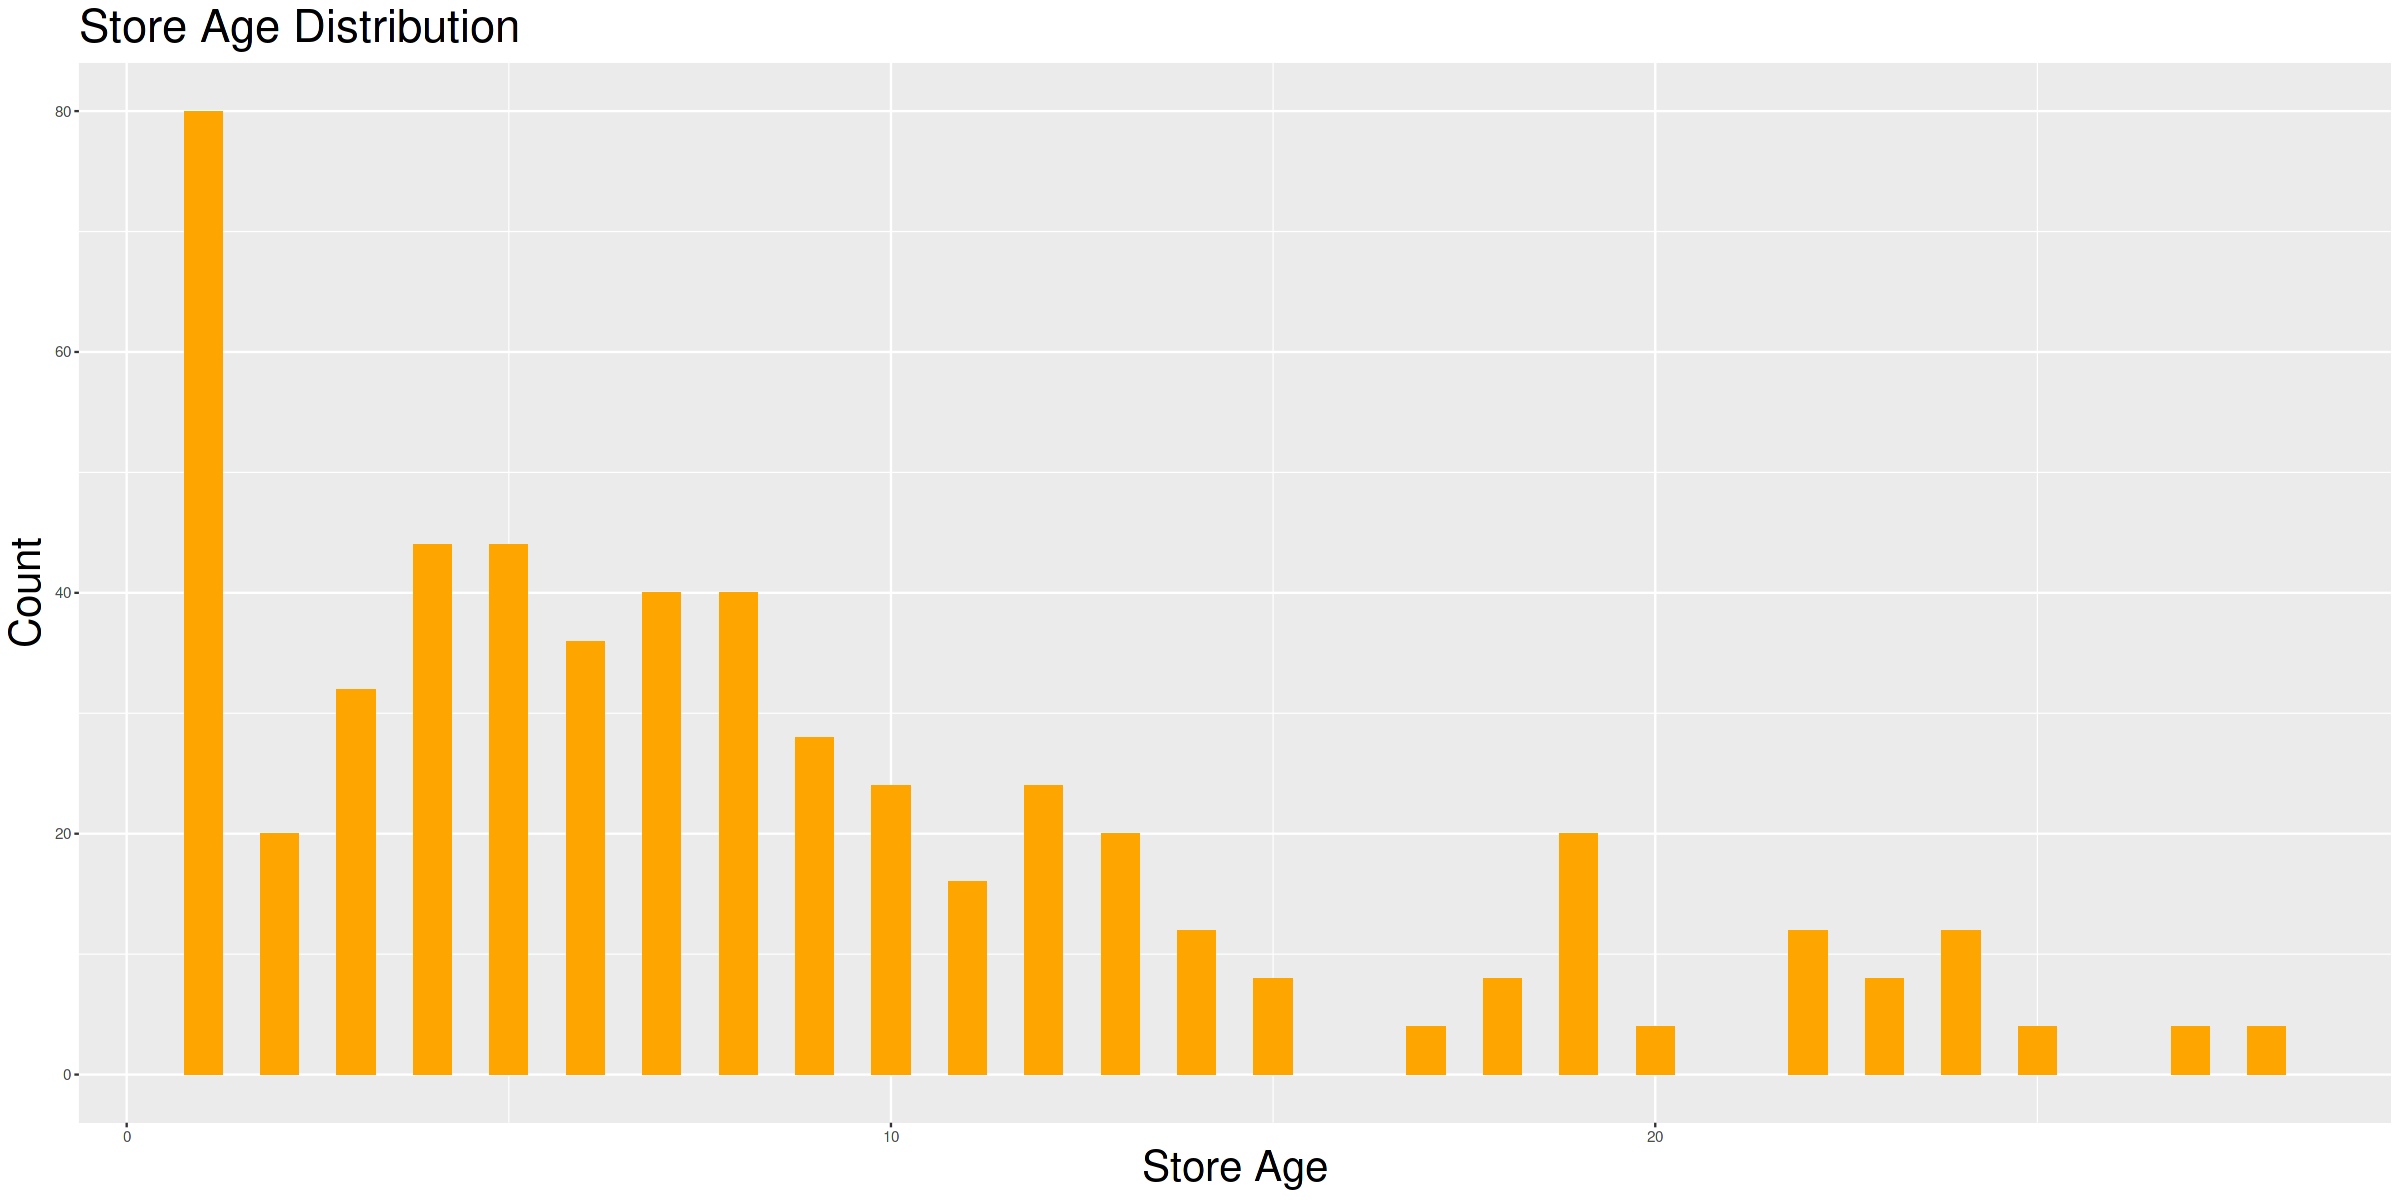

In [4]:
#groupping data by AgeOfStore
Age <- data %>%
group_by(AgeOfStore) %>%
summarize(Count=n())

#visualizing data
ggplot(Age, aes(x=AgeOfStore, y=Count)) +
geom_bar(width=0.5, stat="identity", fill="orange") +
ylab("Count") +
xlab("Store Age") +
ggtitle("Store Age Distribution") +
theme(legend.text=element_text(size=20), plot.title = element_text(size=27), axis.title = element_text(size = 25))



The majority of stores are **10 years old or less**. A large number of stores are **1 year old**. 

Let's look at the age of stores in different promotion groups. For this purpose, I will use **tapply()** which applies a function or operation (*summary* in my case) on a subset of the vector(*AgeOfStore*) broken down by a given factor variable(*Promotion*).

In [5]:
tapply(data$AgeOfStore, data$Promotion, summary)

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   8.279  12.000  27.000 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   7.000   7.979  10.000  28.000 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   8.000   9.234  12.000  24.000 


We see that all three groups seem to have store age profiles. **The average** ages (Mean) of stores for the three groups are **8-9 years** old and **the majority** of the stores are **10-12 years** old or younger.

After exploring the distribution of the variables in the three promotion groups, I can verify that the sample groups are similar and the **A/B testing results will be meaningful and trustworthy.**

## Hypothesis testing

As I mentioned before, it's important to test your hypothesis and seek statistically significant differences among test groups when you run A/b tests. **T-test** is frequently used for that. The t-test compares the two averages and examines whether they are significantly different from each other. 

There are two important statistics in a t-test - the t-value and p-value. The **t-value** measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between two testing groups. **P-value** measures the probability that the result would occur by chance. So the smaller the p-value is, the more statistically significant difference there is between two testing groups.

There is a concept of the null hypothesis and the alternate hypothesis. **The null hypothesis** states that the two groups show no statistically significant difference. **The alternte hypothesis** states the two groups shows a statistically significant difference.

### Computing the t-value and p-value from the equations

There are three things we need to compute to ger the t-value: the mean, the standard deviation, and the number of samples.

In [6]:
promo_1 <- data[which(data$Promotion==1),]$SalesInThousands
promo_2 <- data[which(data$Promotion==2),]$SalesInThousands
promo_3 <- data[which(data$Promotion==3),]$SalesInThousands

#mean
mean_1 <- mean(promo_1)
mean_2 <- mean(promo_2)
mean_3 <- mean(promo_3)
#standard deviation
std_1 <- sd(promo_1)
std_2 <- sd(promo_2)
std_3 <- sd(promo_3)
#number of samples
n_1 <- length(promo_1)
n_2 <- length(promo_2)
n_3 <- length(promo_3)

#t-value comparing promotion 1 and promotion 2
t_value <- (
mean_1 - mean_2
) / sqrt(
(std_1**2/n_1 + std_2**2/n_2)
)
#computing the degrees of freedom
df_1_2 <- n_1 + n_2 - 2
#computing p-value using pt function
p_value <- 2*pt(t_value, df_1_2, lower=FALSE)

#printing t-value and p-value
print(t_value)
print(p_value)


[1] 6.427529
[1] 4.143297e-10


We got the** t-value of 6.4275** and **p-value of 4.143e-10** (which is an extremely small number) that suggest that there is strong evidence against the null hypothesis and that the **difference between promotion 1 and promotion 2 is significant and promotion 1 outperform promotion 2**. 

Let's repeat the same evaluation for promotion group 1 and promotion group 3.

In [7]:
#t-value comparing promotion 1 and promotion 3
t_value <- (
mean_1 - mean_3
) / sqrt(
(std_1**2/n_1 + std_3**2/n_3)
)
#computing the degrees of freedom
df_1_3 <- n_1 + n_3 - 2
#computing p-value using pt function
p_value <- 2*pt(t_value, df_1_3, lower=FALSE)

#printing t-value, p-value and means
print(t_value)
print(p_value)
print(mean_1)
print(mean_2)
print(mean_3)

[1] 1.556022
[1] 0.1205863
[1] 58.09901
[1] 47.32941
[1] 55.36447


Here we got the t-value of 1.5560 and the p-value of 0.1205 (which is much higher than 0.05). This result suggests that **there is no statistically significant difference between promotion groups 1 and 3** even though the average sales from promotion group 1 (58.1) is higher than in group 3 (55.36).

From this evaluation, I can say that promotion 1 and promotion 3 perform better than promotion 2, but the difference between promotion 1 and promotion 3 is not statistically significant. So **the company can use both 1 and 2 marketing strategies for their fast-food retail chain**.

### Computing the t-value and p-value using t.test



In [8]:
#t-test between promo 1 and promo 2
t.test(
promo_1,
promo_2
)


	Welch Two Sample t-test

data:  promo_1 and promo_2
t = 6.4275, df = 346.78, p-value = 4.29e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.474093 14.065101
sample estimates:
mean of x mean of y 
 58.09901  47.32941 


So **we got the same result using t.test**. Let's check promotion 1 and promotion 3.

In [9]:
#t-test between promo 1 and promo 3
t.test(
promo_1,
promo_3
)


	Welch Two Sample t-test

data:  promo_1 and promo_3
t = 1.556, df = 355.92, p-value = 0.1206
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7216369  6.1907240
sample estimates:
mean of x mean of y 
 58.09901  55.36447 


Whether I use the previous approach of manually computing the t-value and p-value or the approach of using t.test, I got the same result - **promotion 1 and 2 outperform promotion 3**.

## Summary

A/B testing is a powerful technique that businesses can use to evaluate new ideas and marketing strategies before fully committing to one or another. In this analysis, I found that the **company should use promotion strategies 1 or 2 to maximize their sales**.